# Convex optimization

<table>
  <tr>
    <td style="width: 50%; vertical-align: top;">
      <b style="font-size: 16px;">Minimize:</b><br>
      <b style="font-size: 16px;">Subject to:</b><br>
    </td>
    <td style="width: 50%; vertical-align: top;">
      <b style="font-size: 16px;">\(f(x)\)</b><br>
      <b style="font-size: 16px;">\(h(x) = 0\)</b><br>
      <b style="font-size: 16px;">\(g(x) \leq 0\)</b><br>
      <b style="font-size: 16px;">\(x \in \Omega\)</b><br>
    </td>
  </tr>
</table>


# Unconstrained problem

# Local Optima

In [1]:
import numpy as np
from scipy.optimize import minimize, line_search
import numdifftools as nd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.art3d as art3d

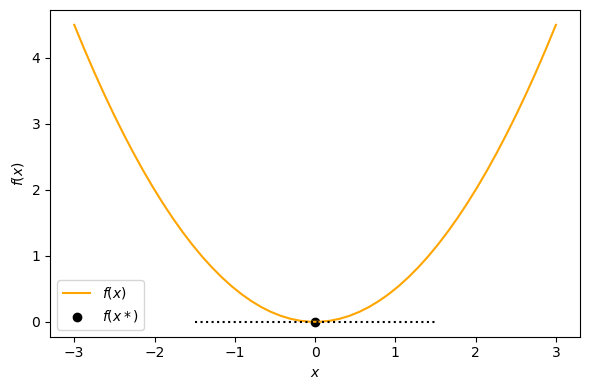

In [2]:
def obj_func1(x):
    return x ** 2 / 2

# calculate the gradient of the function
obj_grad1 = nd.Gradient(obj_func1)

def tan_line1(x, x0):
    slope = obj_grad1
    return slope(x0)*(x-x0) + obj_func1(x0)

x = np.linspace(-3, 3)

fig, ax = plt.subplots(figsize=[6, 4], dpi=100)

ax.plot(x, obj_func1(x), color="orange", label=r"$f(x)$")

x0 = np.array([0])
line_x0 = np.array([-1.5, 1.5]) + x0
ax.scatter(x0, obj_func1(x0), label=r"$f(x*)$", color="black")
ax.plot(line_x0, tan_line1(line_x0, x0), color="black", linestyle=":")

ax.legend()

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")

plt.tight_layout()

plt.show()

$$ f(x) = \left(x_1-0.5 \right)^2 + 0.7x_1x_2 + 1.2\left(x_1-0.7 \right)^2 \tag{1}$$

[ 0.82969838 -0.94199536]


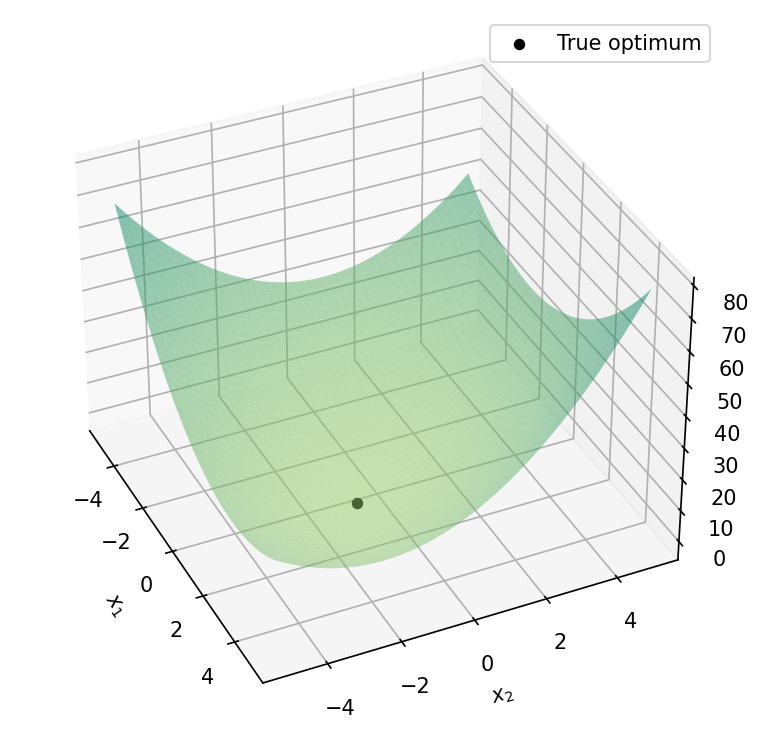

In [3]:
def obj_func2(x):
    return (x[0]-0.5)**2 + 0.7*x[0]*x[1] + 1.2*(x[1] + 0.7)**2

# calculate the gradient of the function
obj_grad2 = nd.Gradient(obj_func2)
hessian2 = nd.Hessian(obj_func2)

true_optima = - np.linalg.solve(hessian2([0, 0]), obj_grad2([0, 0]))
print(true_optima)

# creating a contour plot
n_mesh = 500

x = np.linspace(-5, 5, n_mesh)

X, Y = np.meshgrid(x, x)

Z = obj_func2([X, Y])

fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={"projection": "3d"})

ax.view_init(35, -25)

surf = ax.plot_surface(X1, X2, y, antialiased=True, cmap="summer_r", alpha=0.5, vmin=-50, zorder=-1)

ax.scatter([true_optima[0]],  [true_optima[1]], zs=0, marker="o", color="black", label="True optimum", zorder=1)
ax.legend()

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")

plt.tight_layout()

plt.show()

# Constrained problem

scipy standard form:

\\( g(x) \geq 0 \\)

constraint of the example:

\\( x_1^2 + x_2^2 - 3 \geq 0 \\)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.19794737690373265
       x: [ 1.186e+00 -1.262e+00]
     nit: 6
     jac: [ 4.881e-01 -5.196e-01]
    nfev: 7
    njev: 6


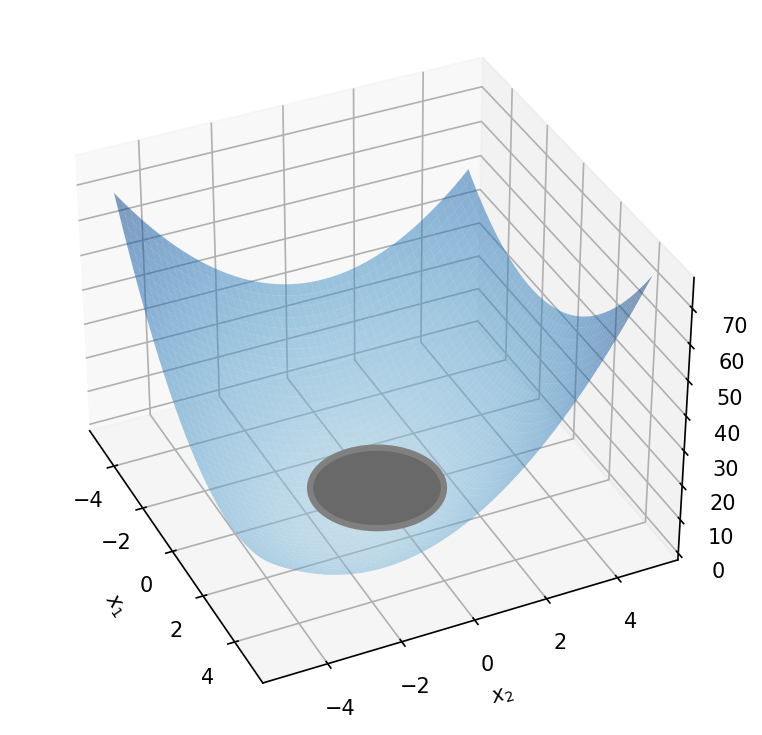

In [4]:
#The constraint is a circle of squared radius 3 and center in zero
def cons_fun(x):
    
    return x[0]**2 + x[1]**2 - 3

#The constraint gradient
cons_grad = nd.Gradient(cons_fun)

#A decent but infeasible initial estimation
sol_cons = minimize(obj_func2, [0., 0.], jac=obj_grad2,
                    constraints={"type":"ineq", "fun":cons_fun, "grad":cons_grad},
                    method="SLSQP")

print(sol_cons)

#Creating a countouf plot
n_mesh = 500

x1 = np.linspace(-5, 5, n_mesh)
x2 = np.linspace(-5, 5, n_mesh)

X1, X2 = np.meshgrid(x1, x2)

X = np.vstack((X1.flatten().reshape([1, -1]), X2.flatten().reshape([1, -1])))
F = np.array([obj_func2(x) for x in X.T])
G = np.array([cons_fun(x) for x in X.T])

y_cons = F.copy()
#y_cons[G < 0] = np.nan

y_cons = y_cons.reshape([n_mesh, n_mesh])

fig, ax = plt.subplots(figsize=[6, 5], dpi=150, subplot_kw={"projection": "3d"})

ax.view_init(35, -25)
ax.computed_zorder = False

surf = ax.plot_surface(X1, X2, y_cons, antialiased=True, cmap="Blues", alpha=0.5, vmin=-50, zorder=0)
circle = plt.Circle((0, 0), np.sqrt(3), facecolor='dimgrey', edgecolor="grey", linewidth=3, alpha=1.0, zorder=1)
ax.add_patch(circle)
art3d.pathpatch_2d_to_3d(circle, z=0, zdir="z")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$f(x)$")

plt.tight_layout()

plt.show()

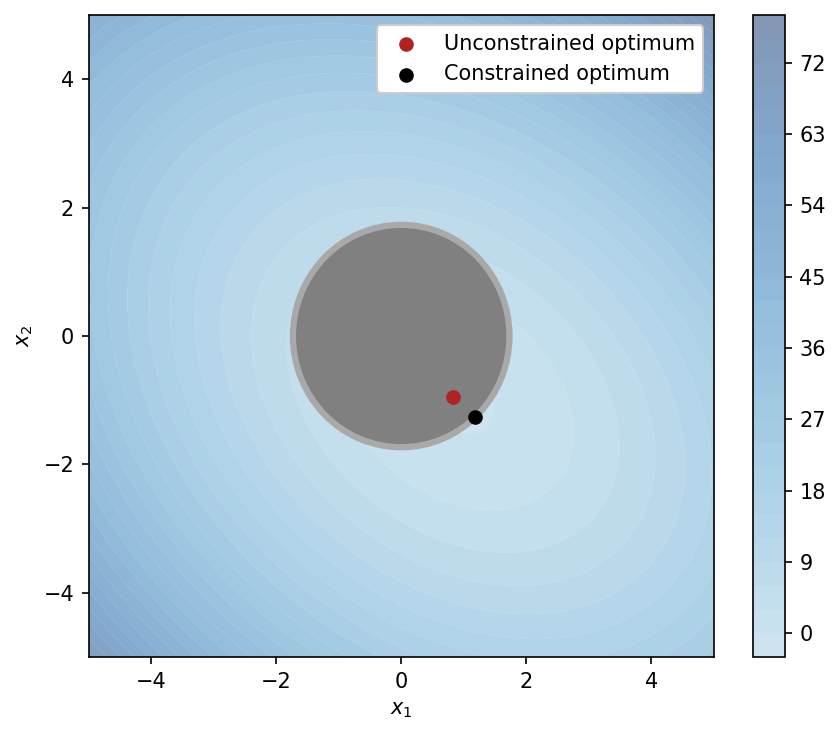

In [5]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=150)

surf = ax.contourf(X1, X2, y_cons, antialiased=True, cmap="Blues", alpha=0.5, levels=25, vmin=-50)

circle = plt.Circle((0, 0), np.sqrt(3), facecolor='grey', edgecolor="darkgrey", linewidth=3, alpha=1.0, zorder=1)
ax.add_patch(circle)

ax.scatter([true_optima[0]],  [true_optima[1]], marker="o", color="firebrick", label="Unconstrained optimum", zorder=2)
ax.scatter([sol_cons.x[0]],  [sol_cons.x[1]], marker="o", color="black", label="Constrained optimum", zorder=3)
ax.legend(framealpha=1)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

fig.colorbar(surf)

plt.tight_layout()

plt.show()

$$ f(x) = e^{0.6(x-10)} + (x-11)^2 \tag{2}$$

# Line search

**Iteration**

$$ x_{k+1} = x_k + a_kp_k $$

**Line search for \\( \alpha \\)**

$$ \phi(\alpha) = f(x_k + a_kp_k) $$

**Wolfe conditions**

\begin{align}
1)~~~ & \phi(\alpha) \leq \phi(0) + c_1 \alpha \phi'(0) \\
2)~~~ & \phi'(\alpha) \leq -c_2 \phi'(0) \notag
\end{align}

The values of \\(c_1\\) and \\(c_2\\) are typically chosen to be small positive constants, often within the ranges [0, 1] for \\(c_1\\) and [\\(c_1\\), 1] for \\(c_2\\), but the specific values may vary depending on the problem and the optimization algorithm being used.

Text(0, 0.5, '$\\phi(\\alpha)$')

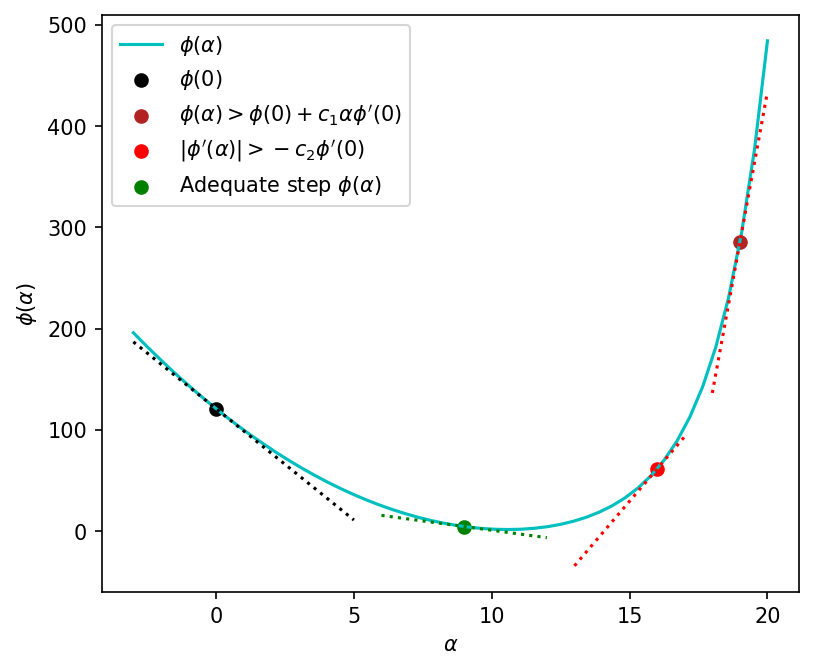

In [6]:
def obj_func3(x):
    return np.exp((x - 10) * 0.6) + (x - 11) ** 2

# calculate the gradient of the function
obj_grad3 = nd.Gradient(obj_func3)

def tan_line3(x, x0):
    slope = obj_grad3
    return slope(x0)*(x-x0) + obj_func3(x0)

x = np.linspace(-3, 20)

fig, ax = plt.subplots(figsize=[6, 5], dpi=150)

ax.plot(x, obj_func3(x), color="c", label=r"$\phi(\alpha)$")

x0 = np.array([0])
line_x0 = np.array([-3, 5]) + x0
ax.scatter(x0, obj_func3(x0), label=r"$\phi(0)$", color="black")
ax.plot(line_x0, tan_line3(line_x0, x0), color="black", linestyle=":")

x1 = np.array([19])
line_x1 = np.array([-1, 1]) + x1
ax.scatter(x1, obj_func3(x1), label=r"$\phi(\alpha) > \phi(0) + c_1 \alpha \phi'(0)$", color="firebrick")
ax.plot(line_x1, tan_line3(line_x1, x1), color="red", linestyle=":")

x2 = np.array([16])
line_x2 = np.array([-3, 1]) + x2
ax.scatter(x2, obj_func3(x2), label=r"|$\phi'(\alpha)| > -c_2 \phi'(0)$", color="red")
ax.plot(line_x2, tan_line3(line_x2, x2), color="red", linestyle=":")

x3 = np.array([9])
line_x3 = np.array([-3, 3]) + x3
ax.scatter(x3, obj_func3(x3), label=r"Adequate step $\phi(\alpha)$", color="green")
ax.plot(line_x3, tan_line3(line_x3, x3), color="green", linestyle=":")

ax.legend()

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\phi(\alpha)$")